In [2]:
from math import *
def f(x):
    return abs(cos(x))** 0.5 + sin( 2 + 3 * x)
def f1(a):
    res = []
    for i in a :
        res.append(f(i))
    return res

def f2(a):
    return [f(i) for i in a]

def f3(a):
    ex = 'abs(cos(x)) ** 0.5 + sin( 2 + 3 * x)'
    return [eval(ex) for x in a]

In [3]:
import numpy as np
def f4(a):
    return (np.abs(np.cos(a))**0.5 + np.sin(2+3*a))


In [11]:
import numexpr as ne
def f5(a):
    ex =  'abs(cos(a)) ** 0.5 + sin( 2 + 3 * a)'
    ne.set_num_threads(1)
    return ne.evaluate(ex)

In [12]:
def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin( 2 + 3 * a)'
    ne.set_num_threads(16)
    return ne.evaluate(ex)

In [8]:
a_py = range(500000)
a_np = np.arange(500000)


In [13]:
%%time
r1 = f1(a_py)
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np)
r5 = f5(a_np)
r6 = f6(a_np)

Wall time: 9.54 s


In [17]:
func_list = ['f1','f2','f3','f4','f5','f6']
data_list = ['a_py','a_py','a_py','a_np','a_np','a_np']

In [18]:
perf_comp_data(func_list,data_list)

NameError: name 'perf_comp_data' is not defined

In [19]:
def perf_comp_data(func_list, data_list, rep=3, number=1):
    """
    Function to compare the performance of different function.
    :param func_list: list with function names as strings
    :param data_list: list with data set names as strings
    :param rep: number of repetitions of the whole comparison
    :param number: number of executions for every function
    :return:
    """
    from timeit import repeat
    res_list = {}
    for name in enumerate(func_list):
        stmt = name[1] + '(' + data_list[name[0]] + ')'
        setup = "from __main__ import " + name[1] + ', ' + data_list[name[0]]
        results = repeat(stmt=stmt, setup=setup, repeat=rep, number=number)
        res_list[name[1]] = sum(results) / rep
    res_sort = sorted(res_list.items(), key=lambda item: item[1])
    for item in res_sort:
        rel = item[1] / res_sort[0][1]
        print('function:' + item[0] + ', av.item sec: %9.5f, ' % item[1] + 'relative: %6.1f' % rel)

In [20]:
perf_comp_data(func_list,data_list)

function:f6, av.item sec:   0.01034, relative:    1.0
function:f5, av.item sec:   0.02223, relative:    2.2
function:f4, av.item sec:   0.02512, relative:    2.4
function:f2, av.item sec:   0.39032, relative:   37.7
function:f1, av.item sec:   0.42959, relative:   41.5
function:f3, av.item sec:   8.36001, relative:  808.5


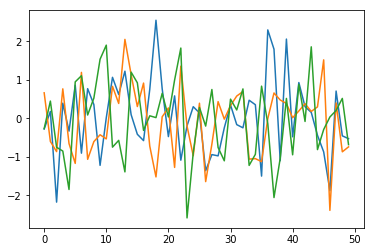

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rand = np.random.standard_normal((50,3))
plt.plot(rand)

In [21]:
def bsm_mcs_valuation(strike):
    S0 = 100.
    T = 1.0
    r = 0.05
    vola = 0.2
    M = 50
    I = 20000
    dt = T/M
    rand = np.random.standard_normal((M+1,I))
    S = np.zeros((M+1,I))
    S[0] = S0
    for t in range(1,M+1):
        S[t] = S[t-1] * np.exp((r-0.5*vola**2)*dt + vola*np.sqrt(dt)*rand[t])
    value = (np.exp(-r * T)*np.sum(np.maximum(S[-1]-strike,0))/I)
    return value

In [22]:
# 顺序化计算
def sep_value(n):
    strikes = np.linspace(80,120,n)
    option_value = []
    for strike in strikes:
        option_value.append(bsm_mcs_valuation(strike))
    return strikes,option_value


In [23]:
n = 100
%time strikes, option_value_seq = sep_value(n)


Wall time: 4.35 s


Text(0, 0.5, 'result')

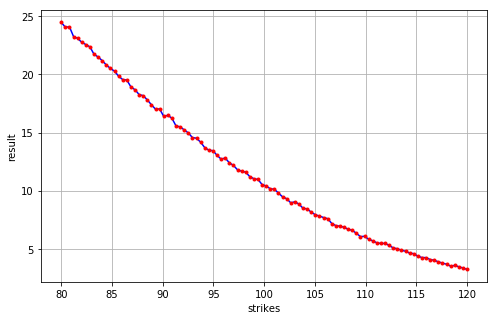

In [31]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(strikes,option_value_seq,'b')
plt.plot(strikes,option_value_seq,'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('result')

In [32]:
from ipyparallel import Client

c = Client(profile='default')
view = c.load_balanced_view()
def par_value(n):
    strikes = np.linspace(80,120,n)
    option_value = []
    for strike in strikes:
        value = view.apply_async(bsm_mcs_valuation(strike))
        option_value.append(value.result)
    return strikes,option_value

SyntaxError: invalid syntax (<ipython-input-32-bf65249a1593>, line 2)

In [34]:
import math
import multiprocessing as mp
import numpy as np
def simulate_geometric_brownian_motion(p):
    M,I = p
    S0 = 100.
    T = 1.0
    r = 0.05
    sigma = 0.2
    dt = T / M
    paths = np.zeros((M+1,I))
    paths[0] = S0
    for t in range(1,M+1):
        paths[t] = paths[t-1] * np.exp((r-0.5*sigma**2)*dt + sigma*math.sqrt(dt)*np.random.standard_normal(I))
    return paths

In [ ]:
I = 10000
M = 100
t = 1


In [ ]:
plt.plot(range(1,4),times)
plt.plot(range(1,4),times,'ro')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('time')

In [ ]:
from time import time
times = []
for w in range(1,4):
    t0 =time()
    pool = mp.Pool(processes=w)
    result = pool.map(simulate_geometric_brownian_motion,t*[(M,I),])
    times.append(time()-t0)